In [1]:
import os
import h5py
from glob import glob
import sys
sys.path.append('/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/scripts/next_gen_detect')
from utils import load_results_from_h5, save_results_to_h5
import numpy as np

In [2]:
inj_dir = os.path.join('/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study', 
                       'gwpopulation/BBH/injections')
file_str = 'LHI_Asharp_SNR_2_pop_PLP_spin_prec_fref_10_z_MD_zmax_10_lmrd_22_corrected_td_12M_points_XPHM_total'
files_to_merge = glob(os.path.join(inj_dir, 'combined_h5_files_select_params', f'{file_str}*.h5'))
files_to_merge

['/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/gwpopulation/BBH/injections/combined_h5_files_select_params/LHI_Asharp_SNR_2_pop_PLP_spin_prec_fref_10_z_MD_zmax_10_lmrd_22_corrected_td_12M_points_XPHM_total.h5',
 '/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/gwpopulation/BBH/injections/combined_h5_files_select_params/LHI_Asharp_SNR_2_pop_PLP_spin_prec_fref_10_z_MD_zmax_10_lmrd_22_corrected_td_12M_points_XPHM_total_batch2.h5']

In [3]:
data_chunks = []
for file in files_to_merge:
    data_chunk = load_results_from_h5(file)
    data_chunks.append(data_chunk)

In [4]:
combined_data = {}
for key in data_chunks[0].keys():
    combined_data[key] = {}
    for key2 in data_chunks[0][key].keys():
        combined_data[key][key2] = np.array([])
        for data_chunk in data_chunks:
            combined_data[key][key2] = np.concatenate([combined_data[key][key2], data_chunk[key][key2]])

In [5]:
total_injs = len(combined_data['total']['redshift'])
print(total_injs)
print('detected_percentage:', len(combined_data['detected_mf_from_opt']['redshift']) / total_injs * 100)

23999989
detected_percentage: 13.79563132299769


### Save the total as .h5 file

In [6]:
out_h5_file = os.path.join(inj_dir, 'combined_h5_files_select_params', file_str.replace('12M', '24M') + '.h5')
out_h5_file

'/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/gwpopulation/BBH/injections/combined_h5_files_select_params/LHI_Asharp_SNR_2_pop_PLP_spin_prec_fref_10_z_MD_zmax_10_lmrd_22_corrected_td_24M_points_XPHM_total.h5'

In [7]:
save_results_to_h5(combined_data, out_h5_file)

/home/divyajyoti/miniconda3/envs/igwn-py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, '$z$')

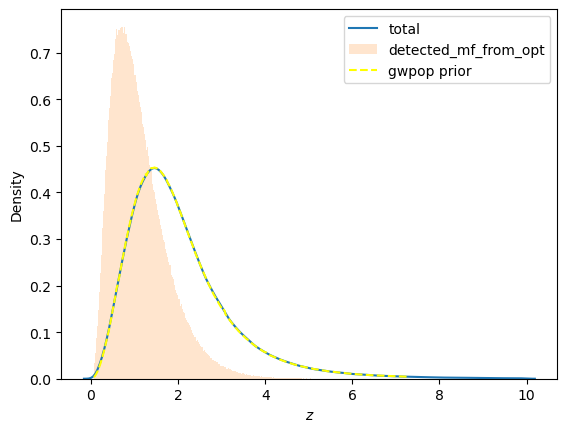

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
npoints = int(1e6)
sns.kdeplot(combined_data['total']['redshift'][:npoints], label='total')
plt.hist(combined_data['detected_mf_from_opt']['redshift'], label='detected_mf_from_opt', bins=1000, alpha=0.2, density=True);
sort_idx_mf = np.argsort(combined_data['detected_mf_from_opt']['redshift'][:npoints])
plt.plot(np.array(combined_data['detected_mf_from_opt']['redshift'])[sort_idx_mf], 
         np.array(combined_data['detected_mf_from_opt']['p_z'])[sort_idx_mf], label='gwpop prior', ls='--', c='yellow')
plt.legend(loc=1, fontsize=10)
plt.xlabel('$z$')

## Write to pickle file

In [29]:
z_dict_write_mf_from_opt = {'redshift':np.array(combined_data['detected_mf_from_opt']['redshift']), 
                            'prior':np.array(combined_data['detected_mf_from_opt']['p_z']),
                            'total_generated':len(combined_data['total']['redshift'])}

In [30]:
z_dict_write_mf_from_opt

{'redshift': array([1.53025396, 0.51891977, 0.56687345, ..., 0.40397554, 2.30781895,
        1.20087956]),
 'prior': array([0.45062168, 0.15642543, 0.18327841, ..., 0.10145747, 0.29202364,
        0.4300392 ]),
 'total_generated': 23999989}

In [32]:
study_label = file_str.split('_12M')[0]
study_label

'LHI_Asharp_SNR_2_pop_PLP_spin_prec_fref_10_z_MD_zmax_10_lmrd_22_corrected_td'

In [36]:
out_file = os.path.join(inj_dir, f'{study_label}_detected_injs_mf_from_opt_SNR_24M_points_XPHM.pkl')
out_file

'/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/gwpopulation/BBH/injections/LHI_Asharp_SNR_2_pop_PLP_spin_prec_fref_10_z_MD_zmax_10_lmrd_22_corrected_td_detected_injs_mf_from_opt_SNR_24M_points_XPHM.pkl'

In [38]:
import dill
with open(out_file, 'wb') as f:
    dill.dump(z_dict_write_mf_from_opt, f)